In [1]:
import numpy as np
import pandas as pd
pd.__version__

'1.0.5'

## Объект series

Это одномерный массив индексированных данных

In [2]:
some_data = [1, 2, 3, 4, 5]
data = pd.Series(some_data)
data

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [3]:
# значения из массива Series
data.values

array([1, 2, 3, 4, 5])

In [4]:
# индекс из массива Series
data.index

RangeIndex(start=0, stop=5, step=1)

In [5]:
# Обращение по индексу доступно
data[1:3]

1    2
2    3
dtype: int64

Фактически серия в pandas инициализирует одномерный массив pandas с той лишь разницей, что к ниму добавляется явно описанный объект index, связанные со значениями массива. Это позволяет, в отличии от numpy использовать не только целые числа в качестве индекса, но и любые объекты, которыми нам удобно индексировать.

In [6]:
data = pd.Series(some_data, index=['a', 'b', 'c', 'd', 'e'])
data

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [7]:
data['a']

1

Объект Series - "специализированный словарь", структура, задающая соответствие типизированных ключей набору типизированных значений. В отличае от словаря, серия поддерживает типичные для среза операции, например срезы.

In [8]:
some_data = {
    'a': 1111,
    'b': 2222,
    'c': 3333,
    'd': 4444,
    'e': 5555
}
data = pd.Series(some_data)
data

a    1111
b    2222
c    3333
d    4444
e    5555
dtype: int64

In [9]:
data['a':'c']

a    1111
b    2222
c    3333
dtype: int64

#### Создание серий

ожидаемый синтаксис 

```python
pd.Series(data, index=index)
```

index не обязателен

data может быть словарем, тогда ключи становятся индексом

data может быть списком или массивом numpy, тогда index не обязателен 

data может быть скаляром, который будет скопирован по индексу

В любом случае индекс можно указать вручную.

In [10]:
pd.Series(5, index=[1, 2, 3, 4, 5])

1    5
2    5
3    5
4    5
5    5
dtype: int64

In [11]:
pd.Series({1: 'a', 2: 'b', 3: 'c'}, index=[1, 2])

1    a
2    b
dtype: object

## Объект DataFrame

Аналог двумерного массива numpy, где у строк и столбцов есть явные обобщенные индексы для доступа к данным. Его можно рассматривать как упорядоченную последовательность выровненных (использующих один и тот же индекс) серий.

In [12]:
some_data = {
    'a': 1111,
    'b': 2222,
    'c': 3333,
    'd': 4444,
    'e': 5555
}
data = pd.Series(some_data)
data

a    1111
b    2222
c    3333
d    4444
e    5555
dtype: int64

In [13]:
some_data_1 = {
    'a': 1000,
    'b': 2000,
    'c': 3000,
    'd': 4000,
    'e': 5000
}
data_1 = pd.Series(some_data_1)
data_1

a    1000
b    2000
c    3000
d    4000
e    5000
dtype: int64

In [14]:
# сконструируем из этого фрейм
frame = pd.DataFrame({'some_data': some_data, 'some_data_1': some_data_1})
frame

,some_data,some_data_1
a,1111,1000
b,2222,2000
c,3333,3000
d,4444,4000
e,5555,5000


In [15]:
# объект индекса строк
frame.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [16]:
# объект индекса стролбцов
frame.columns

Index(['some_data', 'some_data_1'], dtype='object')

DataFrame - специализированный словарь, где задано соответствие имени столбца объекту серии с данными этого столбца.

In [17]:
# доступ к сериям
frame.some_data

a    1111
b    2222
c    3333
d    4444
e    5555
Name: some_data, dtype: int64

In [18]:
frame['some_data']

a    1111
b    2222
c    3333
d    4444
e    5555
Name: some_data, dtype: int64

#### Создание dataframe

In [19]:
# из одиночного объекта серии
pd.DataFrame(data, columns=['data'])

,data
a,1111
b,2222
c,3333
d,4444
e,5555


In [20]:
# из списка словарей
data = [{'a': i, 'b': 2 * i} for i in range(3)]
data

[{'a': 0, 'b': 0}, {'a': 1, 'b': 2}, {'a': 2, 'b': 4}]

In [21]:
pd.DataFrame(data)

,a,b
0,0,0
1,1,2
2,2,4


In [22]:
# при отсутствии некоторых ключей проставляется специальный оюъект Pandas NaN (с приведением во флот)
pd.DataFrame([{'a': 1, 'b': 2}, {'b': 3, 'c': 4}])

,a,b,c
0,1.0,2,NaN
1,NaN,3,4.0


In [23]:
# из словаря объектов серий
data_1 = pd.Series(some_data)
data_2 = pd.Series(some_data_1)
pd.DataFrame({'data_1': data_1, 'data_2': data_2})

,data_1,data_2
a,1111,1000
b,2222,2000
c,3333,3000
d,4444,4000
e,5555,5000


In [24]:
# из двумерного массива NumPy
pd.DataFrame(np.random.rand(3, 3), columns=['this', 'that', 'where'], index=['a', 'b', 'c'])

,this,that,where
a,0.372160,0.933151,0.500694
b,0.502613,0.142041,0.376414
c,0.851848,0.584318,0.679574


In [25]:
# из структурированного массива NumPy
struct = np.zeros(3, dtype=[('A', 'i8'), ('B', 'f8')])
struct

array([(0, 0.), (0, 0.), (0, 0.)], dtype=[('A', '<i8'), ('B', '<f8')])

In [26]:
pd.DataFrame(struct)

,A,B
0,0,0.0
1,0,0.0
2,0,0.0


## Объект Index

Все серии и датафреймы содерат индекс, который можно рассматривать как незименяемый массив или как упорядоченное множество, которое может содержать повторяющиеся значения.

In [27]:
ind = pd.Index([2, 3, 5, 7, 9, 12])
ind

Int64Index([2, 3, 5, 7, 9, 12], dtype='int64')

In [28]:
# обхект index ведет себя как массив, его можно индексировать или применять к нему срезы
ind[1]

3

In [29]:
ind[1:3]

Int64Index([3, 5], dtype='int64')

In [30]:
# обекту index доступны аттрибуты массивов NumPy
print(ind.size, ind.shape, ind.ndim, ind.dtype)

6 (6,) 1 int64


In [31]:
# index является множеством. Доступны все лог.операции над множествами
pd.Index([1, 2, 3, 5, 6]) & pd.Index([1, 2, 3, 4, 5])

Int64Index([1, 2, 3, 5], dtype='int64')

In [32]:
pd.Index([1, 2, 3, 5, 6]) | pd.Index([1, 2, 3, 4, 5])

Int64Index([1, 2, 3, 4, 5, 6], dtype='int64')

## Индексация и выборка данных

### Выборка данных из Series

#### Series как словарь

In [33]:
data = pd.Series([0.25, 0.5, 0.75, 1], index=['a', 'b', 'c', 'd'])
data

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64

In [34]:
data['b']

0.5

In [35]:
'a' in data

True

In [36]:
data.keys()

Index(['a', 'b', 'c', 'd'], dtype='object')

In [37]:
list(data.items())

[('a', 0.25), ('b', 0.5), ('c', 0.75), ('d', 1.0)]

In [38]:
data['e'] = 1.25
data

a    0.25
b    0.50
c    0.75
d    1.00
e    1.25
dtype: float64

#### Series как одномерный массив

In [39]:
# срех через явный индекс
data['a': 'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [40]:
# срез через неявный индекс
data[0:3]

a    0.25
b    0.50
c    0.75
dtype: float64

**<span class="burk">При явном срезе последнее значение включается в срез, а пре неявном - нет!</span>**

In [41]:
# использование маски
data[(data > 0.3) & (data < 1)]

b    0.50
c    0.75
dtype: float64

In [42]:
# индексация через массив индексов
data[['a', 'c']]

a    0.25
c    0.75
dtype: float64

#### Индексаторы loc, iloc, ix

Индексация через срезы может вызвать путаницу, когда у серии индекс числовой, что делает его похожим на неявный индекс. Чтобы устранить путаницу хорошей практикойявляется использование специальных индексирующих атрибутов

In [43]:
# атрибут .loc - индексация с явным индексом
data.loc['a']

0.25

In [44]:
data.loc['a':'c']

a    0.25
b    0.50
c    0.75
dtype: float64

In [45]:
# атрибут .iloc - индексация с неявным индексом
data.iloc[0]

0.25

In [46]:
data.iloc[0:3]

a    0.25
b    0.50
c    0.75
dtype: float64

атрибут .ix deprecated с 20.0

### Выборка данных из DatFrame

#### DataFrame  как словарь

In [47]:
data_1 = pd.Series(some_data)
data_2 = pd.Series(some_data_1)
data = pd.DataFrame({'data_1': data_1, 'data_2': data_2})
data

,data_1,data_2
a,1111,1000
b,2222,2000
c,3333,3000
d,4444,4000
e,5555,5000


In [48]:
data['data_1']

a    1111
b    2222
c    3333
d    4444
e    5555
Name: data_1, dtype: int64

In [49]:
data.data_1

a    1111
b    2222
c    3333
d    4444
e    5555
Name: data_1, dtype: int64

In [50]:
data.data_1 is data['data_1']

True

Обращаться через атрибут возможно не всегда - иногда название столбца может конфликтовать с методами объекта DataFrame или не быть строкой. Также нежелательно присваивать значения через атрибуты

In [51]:
data['data_3'] = data['data_1'] / data['data_2']
data

,data_1,data_2,data_3
a,1111,1000,1.111
b,2222,2000,1.111
c,3333,3000,1.111
d,4444,4000,1.111
e,5555,5000,1.111


#### DataFrame как двумерный массив NumPy

In [52]:
data.values

array([[1.111e+03, 1.000e+03, 1.111e+00],
       [2.222e+03, 2.000e+03, 1.111e+00],
       [3.333e+03, 3.000e+03, 1.111e+00],
       [4.444e+03, 4.000e+03, 1.111e+00],
       [5.555e+03, 5.000e+03, 1.111e+00]])

In [53]:
data.T

,a,b,c,d,e
data_1,1111.000,2222.000,3333.000,4444.000,5555.000
data_2,1000.000,2000.000,3000.000,4000.000,5000.000
data_3,1.111,1.111,1.111,1.111,1.111


<span class="burk">Указание отдельного индекса для массива означает доступ к строке, а указание отдельного индекса для объекта DataFrame - доступ к столбцу</span>

In [54]:
data.values[0]

array([1111.   , 1000.   ,    1.111])

In [55]:
data['data_1']

a    1111
b    2222
c    3333
d    4444
e    5555
Name: data_1, dtype: int64

<span class="burk">Чтобы индексировать DataFrame необходим еще один тип индекса:</span>

.iloc индексирует с помощью неявного индекса

.loc с помощью явного

.ix deprecated с 20.0

In [56]:
data.iloc[3, 2]

1.111

In [57]:
data.iloc[0:3, 0:3]

,data_1,data_2,data_3
a,1111,1000,1.111
b,2222,2000,1.111
c,3333,3000,1.111


In [58]:
data.loc['a', 'data_1']

1111

In [59]:
data.loc['a':'c', 'data_1':'data_2']

,data_1,data_2
a,1111,1000
b,2222,2000
c,3333,3000


In [60]:
# в обоих атрибутах доступны все методы отбора данных и способы присваивания
data.loc['a', 'data_2'] = 5656
data

,data_1,data_2,data_3
a,1111,5656,1.111
b,2222,2000,1.111
c,3333,3000,1.111
d,4444,4000,1.111
e,5555,5000,1.111


#### другие возможности индексации

In [61]:
# Срезы DataFrame индексируют только строки
data['a':'b']

,data_1,data_2,data_3
a,1111,5656,1.111
b,2222,2000,1.111


In [62]:
# со столбцами не выйдет
data['data_1': 'data_2']

,data_1,data_2,data_3


In [63]:
# можно по неявному индексу
data[1:2]

,data_1,data_2,data_3
b,2222,2000,1.111


In [64]:
# можно через маску
data[data.data_1 > 2222]

,data_1,data_2,data_3
c,3333,3000,1.111
d,4444,4000,1.111
e,5555,5000,1.111


## Операции над данными

### Универсальные функции

In [65]:
rnd = np.random.RandomState(42)
ser = pd.Series(rnd.randint(0, 10, 4))
ser

0    6
1    3
2    7
3    4
dtype: int64

In [66]:
df = pd.DataFrame(rnd.randint(0, 10, (3, 4)), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,6,9,2,6
1,7,4,3,7
2,7,2,5,4


In [67]:
# универсальные функции NumPy применяются, создается новый объект с сохранением индекса
np.exp(df)

,A,B,C,D
0,403.428793,8103.083928,7.389056,403.428793
1,1096.633158,54.598150,20.085537,1096.633158
2,1096.633158,7.389056,148.413159,54.598150


In [68]:
np.exp(ser)

0     403.428793
1      20.085537
2    1096.633158
3      54.598150
dtype: float64

In [69]:
np.sin(df * np.pi / 4)

,A,B,C,D
0,-1.000000,7.071068e-01,1.000000,-1.000000e+00
1,-0.707107,1.224647e-16,0.707107,-7.071068e-01
2,-0.707107,1.000000e+00,-0.707107,1.224647e-16


### Выравнивание индексов

#### Выравнивание индексов в сериях

Итоговый, в результате операций, массив будет включать объединение индексов исходных массивов, которые можно определить посредством стандартной арифметики python для этих массивов. Если определить нельзя - NaN

In [70]:
ser1 = pd.Series({
    'a': 1111,
    'b': 2222,
    'c': 3333
}, name='ser1')
ser2 = pd.Series({
    'a': 1111,
    'b': 2222,
    'e': 4444
}, name='ser2')
ser1 / ser2

a    1.0
b    1.0
c    NaN
e    NaN
dtype: float64

In [71]:
ser1.index | ser2.index

Index(['a', 'b', 'c', 'e'], dtype='object')

In [72]:
# можно заменить NaN другим значением, но придется использовать эквивалентные методы
# (вместо унарного + метод add() к примеру)
ser1.add(ser2, fill_value=0)

a    2222.0
b    4444.0
c    3333.0
e    4444.0
dtype: float64

#### Выравнивание индексов в DataFrame

во фреймах выравниваются столбцы и строки. Индексы сортируются перед объединением и <span class="burk">индексы в полученном объекте отсортированы</span>

In [73]:
A = pd.DataFrame(rnd.randint(0, 20, (2, 2)), columns=list('AB'))
B = pd.DataFrame(rnd.randint(0, 10, (3, 3)), columns=list('ACB'))
A

,A,B
0,1,11
1,5,1


In [74]:
B

,A,C,B
0,4,0,9
1,5,8,0
2,9,2,6


In [75]:
A + B

,A,B,C
0,5.0,20.0,NaN
1,10.0,1.0,NaN
2,NaN,NaN,NaN


In [76]:
# можно сипользовать собственные значения вместо NaN
fill = A.stack().mean()
A.add(B, fill_value=fill)

,A,B,C
0,5.0,20.0,4.5
1,10.0,1.0,12.5
2,13.5,10.5,6.5


Соответствие между операторами

|Python Operator | Pandas Method(s)                      |
|-----------------|---------------------------------------|
| ``+``           | ``add()``                             |
| ``-``           | ``sub()``, ``subtract()``             |
| ``*``           | ``mul()``, ``multiply()``             |
| ``/``           | ``truediv()``, ``div()``, ``divide()``|
| ``//``          | ``floordiv()``                        |
| ``%``           | ``mod()``                             |
| ``**``          | ``pow()``                             |

#### Выполнение операций между Series и DataFrame

In [77]:
A = rnd.randint(10, size=(3, 4))
A

array([[3, 8, 2, 4],
       [2, 6, 4, 8],
       [6, 1, 3, 8]])

In [78]:
# в NumPy частая операция - разность двумерного массива и одной из его строк. Выполняется построчно
A - A[0]

array([[ 0,  0,  0,  0],
       [-1, -2,  2,  4],
       [ 3, -7,  1,  4]])

In [79]:
# в Pandas тоже самое
df = pd.DataFrame(A, columns=list('QWGT'))
df

,Q,W,G,T
0,3,8,2,4
1,2,6,4,8
2,6,1,3,8


In [80]:
# необходимо указание измерения, в котором будет производиться операция. axis 1 - строки, axis 2 - столбцы
df.subtract(df['W'], axis=0)

,Q,W,G,T
0,-5,0,-6,-4
1,-4,0,-2,2
2,5,0,2,7


In [81]:
# выравнивание выполняется автоматически
df.subtract(df['W'], axis=1)

,0,1,2,G,Q,T,W
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# вычтем строку
df.subtract(df.loc[0], axis=1)

,Q,W,G,T
0,0,0,0,0
1,-1,-2,2,4
2,3,-7,1,4


In [83]:
df.subtract(df.loc[0], axis=0)

,Q,W,G,T
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
G,NaN,NaN,NaN,NaN
Q,NaN,NaN,NaN,NaN
T,NaN,NaN,NaN,NaN
W,NaN,NaN,NaN,NaN


In [84]:
# без указания измерения, операция применяется ко всему массиву, естественно с сортировкой индексов
h = df.loc[0, ::2]
h

Q    3
G    2
Name: 0, dtype: int64

In [85]:
df - h

,G,Q,T,W
0,0.0,0.0,NaN,NaN
1,2.0,-1.0,NaN,NaN
2,1.0,3.0,NaN,NaN


## Обработка отсутствующих данных

Еть несколько стратеги обозначения пропусков:

Значение - индикатор (может привести к дополнительным неоптимизированным расчетам):

- условное оозначение, например число -9999 или редко встречающееся сочетание битов
- условное обозначение через NaN - специальное значение, определенное спецификацией для чисел с плавающей точкой. NaN доступен не для всех типов данных

Маска (требует памяти):

- отдельный булевый массив
- выделение одного бита представления на локальную индикацию пропуска

Pandas построена на NumPy, в котором отсутствует понятие пропуска для всех данных кроме данных с плавающей точкой. NumPy поддерживает маски, но использование такого подходжа в Pandas влечет значительные накладные расходы на хранение и ычисление и поддержку кода.

<span class="burk">В итоге в Pandas используется:

- индикаторы - числа
- NaN из Numpy
- None из Python</span>

### Объект None

None - объект python. Его нельзя использовать в NumPy и производных массивах Pandas. None используется только в массивах с типом object, т.е. массивох данных языка Python. <span class="burk">Когда мы создаем массив используя None, автоматически создается массив с типом object</span>

Тип object означает, что NumPy не смог установить тип объектов массива, единственное что он знает - это то, что это объекты python. <span class="burk">Операции с такими массивами будут производится на уровне языка python, т.е. со всеми накладными расходами.</span>

Кроме того, функции агрегирования по масиву, например massive.sum() или massive.min() выбросят ошибку, так как операции между численным значением и значением None не определены

In [86]:
vl1 = np.array([1, None, 3, 4])
vl1

array([1, None, 3, 4], dtype=object)

In [87]:
for dtype in ['object', 'int']:
    print('dtype=', dtype)
    %timeit np.arange(1E6, dtype=dtype).sum()
    print()

dtype= object
36.9 ms ± 337 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)

dtype= int
849 µs ± 3.28 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)



### Объект NaN - отсутстие числового значения

NaN обусловлен стандартом IEEE и присутствует во всех системах, поддерживающих этот стандарт. Это филлер для письма с плавающей точкой. 

Это вызывает некоторые проблемы - если NaN попадает в массив, все данные приводятся к числам с плавающей точкой. Кроме того, все операции с NaN приводят к NaN, в том числе и функции агрегирования.

In [88]:
vl2 = np.array([1, np.nan, 3, 4])
vl2

array([ 1., nan,  3.,  4.])

In [89]:
vl2.dtype

dtype('float64')

In [90]:
1 + np.nan

nan

In [91]:
0 / np.nan

nan

In [92]:
type(np.nan)

float

In [93]:
vl2.sum()

nan

In [94]:
# NumPy предоставляет специальные агрегирующие функции для NaN. Например так:
np.nanmax(vl2)

4.0

### Nan и None

Pandas преобразует None в NaN в предельном случае. Естственно осуществляется и повышающее преобразование с приведением всех непустых числовых значений к числу с плавающей точкой, а всех отсальных к NaN

In [95]:
pd.Series([1, np.nan, 3, None])

0    1.0
1    NaN
2    3.0
3    NaN
dtype: float64

In [96]:
x = pd.Series([1, 2, 3], dtype='int8')
x

0    1
1    2
2    3
dtype: int8

In [97]:
x[0] = None
x

0    NaN
1    2.0
2    3.0
dtype: float64

Правила повышающих преобразований типов в Pandas (строки всегда хранятся как object)

|Typeclass     | Conversion When Storing NAs | NA Sentinel Value      |
|--------------|-----------------------------|------------------------|
| ``floating`` | No change                   | ``np.nan``             |
| ``object``   | No change                   | ``None`` or ``np.nan`` |
| ``integer``  | Cast to ``float64``         | ``np.nan``             |
| ``boolean``  | Cast to ``object``          | ``None`` or ``np.nan`` |

### Операции над пустыми значениями

Методы в Pandas:

- isnull() - генерирует булеву маску для отсутствующих значений
- notnull()
- dropna() - филтрация данных по отсутствующим значениям
- fillna() - замена пропусков с возвратом копии

In [98]:
data = pd.Series([1, np.nan, 'this', None])
data

0       1
1     NaN
2    this
3    None
dtype: object

In [99]:
data.isnull()

0    False
1     True
2    False
3     True
dtype: bool

In [100]:
data.notnull()

0     True
1    False
2     True
3    False
dtype: bool

In [101]:
# отбрасываем строки с пустыми значениями
data.dropna()

0       1
2    this
dtype: object

In [102]:
# в случае фрейма можно выбрать колонки
frame = pd.DataFrame([[1, 1, np.nan],
                     [2, 2, 2],
                     [3, 3, np.nan]])
frame

,0,1,2
0,1,1,NaN
1,2,2,2.0
2,3,3,NaN


In [103]:
frame.dropna()

,0,1,2
1,2,2,2.0


In [104]:
frame.dropna(axis='columns')

,0,1
0,1,1
1,2,2
2,3,3


Можно задать два параметра:

how='any' по дефолту, можно переопределить как 'all' - будут отбрасываться только полностью пустые строки/столбцы

thresh задает минимальное значение непустых значений, выше которого строки/столбцы не отбрасываются

In [105]:
frame.dropna(axis='columns', how='all')

,0,1,2
0,1,1,NaN
1,2,2,2.0
2,3,3,NaN


In [106]:
frame.dropna(axis='columns', thresh=1)

,0,1,2
0,1,1,NaN
1,2,2,2.0
2,3,3,NaN


In [107]:
frame.dropna(axis='columns', thresh=2)

,0,1
0,1,1
1,2,2
2,3,3


In [108]:
# заполнение пропусков
frame.fillna(0)

,0,1,2
0,1,1,0.0
1,2,2,2.0
2,3,3,0.0


In [109]:
# копируя предыдущее значение (по дефолту заполнение идет по столбцам)
frame.fillna(method='ffill')

,0,1,2
0,1,1,NaN
1,2,2,2.0
2,3,3,2.0


In [110]:
# копируя следующее значение
frame.fillna(method='bfill')

,0,1,2
0,1,1,2.0
1,2,2,2.0
2,3,3,NaN


In [111]:
# теперь по строкам
frame.fillna(method='ffill', axis=1)

,0,1,2
0,1.0,1.0,1.0
1,2.0,2.0,2.0
2,3.0,3.0,3.0


## Иерархическая индексация

Pandas предоставляет объекты Panel и Panel4D, которые позволяют хранить 3д и 4д данные. На практике чаще используется иерархическая индексация или мултииндекс, когда в один индекс включается несколько уровней.

### Мульти-индексный Series и его преобразование в DataFrame

In [112]:
index = [('this', 1000), ('this', 2000),
        ('that', 1000), ('that', 2000),
        ('where', 1000), ('where', 2000)]
data =[12345, 23456,
      34567, 45678,
      56789, 67890]
#создадим мульти-индекс (аргумент names не обязателен, можно не именовать подиндексы)
index = pd.MultiIndex.from_tuples(index, names=['one', 'two'])
index

MultiIndex([( 'this', 1000),
            ( 'this', 2000),
            ( 'that', 1000),
            ( 'that', 2000),
            ('where', 1000),
            ('where', 2000)],
           names=['one', 'two'])

In [113]:
ser = pd.Series(data, index=index)
ser

one    two 
this   1000    12345
       2000    23456
that   1000    34567
       2000    45678
where  1000    56789
       2000    67890
dtype: int64

In [114]:
# есть метод для преобразования в датафрейм
[['a', 'b'], [1, 2]]
frame = ser.unstack()
frame

two,1000,2000
one,,
that,34567,45678
this,12345,23456
where,56789,67890


In [115]:
# и обратно в серию
frame.stack()

one    two 
that   1000    34567
       2000    45678
this   1000    12345
       2000    23456
where  1000    56789
       2000    67890
dtype: int64

In [116]:
# если нужно добавить новое измерение, мы просто расширяем серию до массива
frame = pd.DataFrame({'some': ser, 'who': [11111, 22222,
                                          33333, 44444,
                                          55555, 66666]})
frame

some    who
one   two               
this  1000  12345  11111
      2000  23456  22222
that  1000  34567  33333
      2000  45678  44444
where 1000  56789  55555
      2000  67890  66666

In [117]:
# все универсальные функции доступны
frame_1 = frame['some'] / frame['who']
frame_1.unstack()

two,1000,2000
one,,
that,1.037020,1.027765
this,1.111061,1.055531
where,1.022212,1.018360


### Создание мульти-индексов

Наиболее простой метод - переда ть в конструктор список из двух и более индексных массивов

In [118]:
df = pd.DataFrame(np.random.rand(4, 2),
                 index=[['a', 'b', 'c', 'd'], [1, 1, 2, 2]],
                 columns=['one', 'two'])
df

,,one,two
a,1,0.000655,0.950312
b,1,0.630698,0.579978
c,2,0.989948,0.296666
d,2,0.378479,0.374189


Вариант №2 - передать словарь с соответствующими кортежами вместо ключей

In [119]:
index = {('this', 1000): 12345, 
         ('this', 2000): 23456,
         ('that', 1000): 34567, 
         ('that', 2000): 45678,
         ('where', 1000): 56789, 
         ('where', 2000): 67890}
pd.Series(index)

this   1000    12345
       2000    23456
that   1000    34567
       2000    45678
where  1000    56789
       2000    67890
dtype: int64

Часто более эффективно - явнос создать индекс и передать его при создании объекта серии или фрейма

- pd.MultiIndex.from_arrays()
- pd.MultiIndex.from_tuples()
- pd.MultiIndex.from_product()
- pd.MultiIndex.from_frame()

In [120]:
# из простго списка массивов, задающих значения в каждом из уровней
pd.MultiIndex.from_arrays([['a', 'b', 'a', 'b'], [1, 1, 2, 2]], names=['one', 'two'])

MultiIndex([('a', 1),
            ('b', 1),
            ('a', 2),
            ('b', 2)],
           names=['one', 'two'])

In [121]:
# из списка кортежей, задающих все значения индекса в кажжой из точек
pd.MultiIndex.from_tuples([('a', 1), ('a', 2), ('b', 1), ('b', 2)], names=['one', 'two'])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['one', 'two'])

In [122]:
# из декартова произведения обычных индексов
pd.MultiIndex.from_product([['a', 'b'], [1, 2]], names=['one', 'two'])

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 1),
            ('b', 2)],
           names=['one', 'two'])

In [123]:
# из фрейма
df = pd.DataFrame([['HI', 'Temp'], ['HI', 'Precip'],
                   ['NJ', 'Temp'], ['NJ', 'Precip']],
                   columns=['a', 'b'])
pd.MultiIndex.from_frame(df, names=['one', 'two'])

MultiIndex([('HI',   'Temp'),
            ('HI', 'Precip'),
            ('NJ',   'Temp'),
            ('NJ', 'Precip')],
           names=['one', 'two'])

[Подробнее тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html)

#### Названия мульти-индексов

In [124]:
# можно передать после создания
index = [('this', 1000), ('this', 2000),
        ('that', 1000), ('that', 2000),
        ('where', 1000), ('where', 2000)]
data =[12345, 23456,
      34567, 45678,
      56789, 67890]
index = pd.MultiIndex.from_tuples(index)
ser = pd.Series(data, index=index)
ser

this   1000    12345
       2000    23456
that   1000    34567
       2000    45678
where  1000    56789
       2000    67890
dtype: int64

In [125]:
ser.index.names = ['one', 'two']
ser

one    two 
this   1000    12345
       2000    23456
that   1000    34567
       2000    45678
where  1000    56789
       2000    67890
dtype: int64

#### Мульти-индекс для столбцов

Несколько индексов может быть и у столбцов. Индекс задается так-же

In [126]:
index = pd.MultiIndex.from_product([[2020, 2021], 
                                    [1, 2]], names=['one', 'two'])
columns = pd.MultiIndex.from_product([['uno', 'two', 'quatro'], 
                                     ['odin', 'dva']], names=['one', 'two'])
data = np.round(np.random.randn(4, 6), 1)
frame = pd.DataFrame(data, index=index, columns=columns)
frame

one       uno       two      quatro     
two      odin  dva odin  dva   odin  dva
one  two                                
2020 1    0.6 -0.0  1.4 -0.7    0.9  1.5
     2   -0.5 -0.6  1.6 -0.1   -3.1  0.8
2021 1   -0.8  0.1 -0.6  0.3   -0.4  0.4
     2   -0.5  2.6 -2.2  0.4    0.1  0.0

### Индексация и срезы по мульти-индексу

#### Мультииндексация Series

In [127]:
index = [('this', 1000), ('this', 2000),
        ('that', 1000), ('that', 2000),
        ('where', 1000), ('where', 2000)]
data =[12345, 23456,
      34567, 45678,
      56789, 67890]
index = pd.MultiIndex.from_tuples(index)
ser = pd.Series(data, index=index)
ser

this   1000    12345
       2000    23456
that   1000    34567
       2000    45678
where  1000    56789
       2000    67890
dtype: int64

In [128]:
ser['that', 2000]

45678

In [129]:
# поддерживается частичная индексация
ser['that']

1000    34567
2000    45678
dtype: int64

In [130]:
# поддерживаются частичные срезы, если мультииндекс отсортирован
ser = ser.sort_index()
ser

that   1000    34567
       2000    45678
this   1000    12345
       2000    23456
where  1000    56789
       2000    67890
dtype: int64

In [131]:
ser.loc['that':'this']

that  1000    34567
      2000    45678
this  1000    12345
      2000    23456
dtype: int64

In [132]:
# астиная индексация по нижнему уровню отсортированного массива
ser[:, 1000]

that     34567
this     12345
where    56789
dtype: int64

In [133]:
# маски работают
ser[ser > 50000]

where  1000    56789
       2000    67890
dtype: int64

In [134]:
# выборки тоже
ser[['that', 'this']]

that  1000    34567
      2000    45678
this  1000    12345
      2000    23456
dtype: int64

#### Дата-фреймы ведут себя аналогично

In [135]:
index = pd.MultiIndex.from_product([[2020, 2021], 
                                    [1, 2]], names=['one', 'two'])
columns = pd.MultiIndex.from_product([['uno', 'two', 'quatro'], 
                                     ['odin', 'dva']], names=['one', 'two'])
data = np.round(np.random.randn(4, 6), 1)
frame = pd.DataFrame(data, index=index, columns=columns)
frame

one       uno       two      quatro     
two      odin  dva odin  dva   odin  dva
one  two                                
2020 1    1.3  0.8 -2.1 -0.9   -0.3  0.3
     2   -1.6 -1.2  0.9 -0.7   -1.5  0.1
2021 1   -1.8 -0.8 -0.3  1.5    1.6 -0.8
     2    1.3  1.1  0.5  0.5    0.3 -0.5

In [136]:
# по столбцам в неявном виде
frame['uno', 'dva']

one   two
2020  1      0.8
      2     -1.2
2021  1     -0.8
      2      1.1
Name: (uno, dva), dtype: float64

In [137]:
# в неявном виде вначале идут столбцы
frame['uno', 'dva'][2020, 2]

-1.2

In [138]:
# в явном виде сначала строки (через .loc)
frame.loc[(2020, 2), ('uno', 'dva')]

-1.2

In [139]:
# чтобы избежать ошибки со срезами внутри кортежа, используется явный вид среза
# встроенная ф-ия python slice() или объект IndexSlice
idx = pd.IndexSlice
frame.loc[idx[:, 1], idx[:, 'odin']]

,one,uno,two,quatro
,two,odin,odin,odin
one,two,,,
2020,1,1.3,-2.1,-0.3
2021,1,-1.8,-0.3,1.6


[подробнее тут](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html#advanced-indexing-with-hierarchical-index)

### Перегруппировка мульти-индексов

Сортировка индекса (в том числе для успешных срезов) осуществляется через .sort_index() и .sortlevel()

Преобразование фрейма в серию и обратно с сохранением мульти-индекса осуществляется через .stack() и .unstack()ю При этом можно указать требуемый уровень

In [140]:
ser.unstack(level=0)

,that,this,where
1000,34567,12345,56789
2000,45678,23456,67890


In [141]:
ser.unstack(level=1)

,1000,2000
that,34567,45678
this,12345,23456
where,56789,67890


In [142]:
ser.unstack(level=1).stack()

that   1000    34567
       2000    45678
this   1000    12345
       2000    23456
where  1000    56789
       2000    67890
dtype: int64

Еще один способ перегруппировки - преобразование с помощью метода reset_index() и set_index()

In [143]:
frame

one       uno       two      quatro     
two      odin  dva odin  dva   odin  dva
one  two                                
2020 1    1.3  0.8 -2.1 -0.9   -0.3  0.3
     2   -1.6 -1.2  0.9 -0.7   -1.5  0.1
2021 1   -1.8 -0.8 -0.3  1.5    1.6 -0.8
     2    1.3  1.1  0.5  0.5    0.3 -0.5

In [144]:
frame.reset_index(level=['one', 'two'])

one   one two  uno       two      quatro     
two           odin  dva odin  dva   odin  dva
0    2020   1  1.3  0.8 -2.1 -0.9   -0.3  0.3
1    2020   2 -1.6 -1.2  0.9 -0.7   -1.5  0.1
2    2021   1 -1.8 -0.8 -0.3  1.5    1.6 -0.8
3    2021   2  1.3  1.1  0.5  0.5    0.3 -0.5

In [145]:
frame.reset_index(level=['one', 'two'], inplace=True)

In [146]:
frame

one   one two  uno       two      quatro     
two           odin  dva odin  dva   odin  dva
0    2020   1  1.3  0.8 -2.1 -0.9   -0.3  0.3
1    2020   2 -1.6 -1.2  0.9 -0.7   -1.5  0.1
2    2021   1 -1.8 -0.8 -0.3  1.5    1.6 -0.8
3    2021   2  1.3  1.1  0.5  0.5    0.3 -0.5

In [147]:
frame.set_index('one')

one  two  uno       two      quatro     
two      odin  dva odin  dva   odin  dva
one                                     
2020   1  1.3  0.8 -2.1 -0.9   -0.3  0.3
2020   2 -1.6 -1.2  0.9 -0.7   -1.5  0.1
2021   1 -1.8 -0.8 -0.3  1.5    1.6 -0.8
2021   2  1.3  1.1  0.5  0.5    0.3 -0.5

[подробнее тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) и [тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html)

#### Агрегирование по мульти-индексам

Осуществляется с передачей параметра level для указания подмножества данных

In [148]:
index = pd.MultiIndex.from_product([[2020, 2021], 
                                    [1, 2]], names=['one', 'two'])
columns = pd.MultiIndex.from_product([['uno', 'two', 'quatro'], 
                                     ['odin', 'dva']], names=['one', 'two'])
data = np.round(np.random.randn(4, 6), 1)
frame = pd.DataFrame(data, index=index, columns=columns)
frame
data_mean = frame.mean(level='one')
data_mean

one    uno         two       quatro      
two   odin   dva  odin   dva   odin   dva
one                                      
2020 -0.90 -0.15  0.15 -0.25   0.90  0.15
2021  0.95  0.40 -1.05 -0.20   0.25  0.40

In [149]:
# извлекаем по столбцам
data_mean.mean(axis=1, level='two')

two,odin,dva
one,,
2020,0.05,-0.083333
2021,0.05,0.200000


## Объединение данных

### Конкатенация и добавление в конец

In [150]:
def make_df(cols, ind):
    data = {c: [str(c) + str(i) for i in ind] for c in cols}
    return pd.DataFrame(data, ind)

In [151]:
make_df('ABC', range(3))

,A,B,C
0,A0,B0,C0
1,A1,B1,C1
2,A2,B2,C2


Функция pd.concat() аналогична np.сoncatenate.По умолчанию конкатенация производится построчно, т.е. axis=0

In [152]:
# простая конкатенация масивов
ser1 = pd.Series(['A', 'B', 'C'], index=[1, 2, 3])
ser2 = pd.Series(['D', 'E', 'F'], index=[4, 5, 6])
pd.concat([ser1, ser2])

1    A
2    B
3    C
4    D
5    E
6    F
dtype: object

In [153]:
# простая конкатенация датафреймов
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
print(df1)
print(df2)
print(pd.concat([df1, df2]))

    A   B
1  A1  B1
2  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
1  A1  B1
2  A2  B2
3  A3  B3
4  A4  B4


In [154]:
# с конкатенацией по колонкам
df1 = make_df('AB', [1, 2])
df2 = make_df('CD', [1, 2])
print(df1)
print(df2)
print(pd.concat([df1, df2], axis=1))

    A   B
1  A1  B1
2  A2  B2
    C   D
1  C1  D1
2  C2  D2
    A   B   C   D
1  A1  B1  C1  D1
2  A2  B2  C2  D2


#### Дублирование индексов

In [155]:
# при конкатенации в пандас, в отличае от numpy производится дублирование индексов - т.е. повторяющися
# индексы не заменяются, а добавляются
df1 = make_df('AB', [1, 2])
df2 = make_df('AB', [3, 4])
df1.index = df2.index
print(df1)
print(df2)
print(pd.concat([df1, df2]))

    A   B
3  A1  B1
4  A2  B2
    A   B
3  A3  B3
4  A4  B4
    A   B
3  A1  B1
4  A2  B2
3  A3  B3
4  A4  B4


In [156]:
# решение №1 - перехват повторов как ошибки
try:
    pd.concat([df1, df2], verify_integrity=True)
except ValueError as e:
    print('ValueError:', e)

ValueError: Indexes have overlapping values: Int64Index([3, 4], dtype='int64')


In [157]:
# решение №2 - игнор индекса. В этом случае конкатенируемые индексы игнорируются
# создается новый целочисленный
print(pd.concat([df1, df2], ignore_index=True))

    A   B
0  A1  B1
1  A2  B2
2  A3  B3
3  A4  B4


In [158]:
# решение №3 - добавление ключей мультииндекса
print(pd.concat([df1, df2], keys=['df1', 'df2']))

        A   B
df1 3  A1  B1
    4  A2  B2
df2 3  A3  B3
    4  A4  B4


#### Конкатенация с использованием соединений

Позволяет конкатенировать фреймы, у которых названия столбцов частично не совпадают. По умолчанию элементы, данные для которых отсутствуют, получают NaN. Чтобы изменить это поведение, можно указать соответствующие опции

In [159]:
df1 = make_df('ABC', [1, 2])
df2 = make_df('BCD', [3, 4])
print(df1)
print(df2)
print(pd.concat([df1, df2]))

    A   B   C
1  A1  B1  C1
2  A2  B2  C2
    B   C   D
3  B3  C3  D3
4  B4  C4  D4
     A   B   C    D
1   A1  B1  C1  NaN
2   A2  B2  C2  NaN
3  NaN  B3  C3   D3
4  NaN  B4  C4   D4


In [160]:
# join='inner' - пересечение столбцов
print(pd.concat([df1, df2], join='inner'))

    B   C
1  B1  C1
2  B2  C2
3  B3  C3
4  B4  C4


#### Метод append() - метод для непосредственной конкатенации массивов

Не изменяет исходный объект в отличае от питоньего append() extend(). Вместо этого создается новый объект. Это затратно, поэтому, когда есть множество операций с массивами, лучше использовать concat()

In [161]:
df1.append(df2)

,A,B,C,D
1,A1,B1,C1,NaN
2,A2,B2,C2,NaN
3,NaN,B3,C3,D3
4,NaN,B4,C4,D4


[Подробнее про concat](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

### Слияние и соединение

pd.merge и join() реализуют реляционную алгебру в pandas, что позволяет работать с данными как с БД

pd.merge реализуте несколько соединений:

- один-к-одному
- многие-ко-многому
- многие-ко-многим

Тип соединения зависит от формы представленных данных

#### один-к-одному

Подобно конкатенации по столбцам. Функция merge находит общий столбец и автоматически соединяет по нему. Порядок записей может не сохраняться. Кроме того, слияние игнорирует индекс.

In [162]:
df1 = pd.DataFrame({'emploee': ['bob', 'jake', 'lisa', 'sue'],
                   'group': ['accounting', 'engineering', 'engineering', 'hr']})
df2 = pd.DataFrame({'emploee': ['lisa', 'bob', 'jake', 'sue'],
                   'date': [2004, 2008, 2012, 2014]})
print(df1); print(df1)

  emploee        group
0     bob   accounting
1    jake  engineering
2    lisa  engineering
3     sue           hr
  emploee        group
0     bob   accounting
1    jake  engineering
2    lisa  engineering
3     sue           hr


In [163]:
df3 = pd.merge(df1, df2)
print(df3)

  emploee        group  date
0     bob   accounting  2008
1    jake  engineering  2012
2    lisa  engineering  2004
3     sue           hr  2014


#### многие-ко-многому

Один из двух ключевых столбцов содержит дубли. Добавляются столбцы, в которых будут дублирующие данные

In [164]:
df4 = pd.DataFrame({'group': ['accounting', 'engineering', 'hr'],
                   'supervisor': ['carly', 'guido', 'steve']})
print(df4)

         group supervisor
0   accounting      carly
1  engineering      guido
2           hr      steve


In [165]:
print(pd.merge(df3, df4))

  emploee        group  date supervisor
0     bob   accounting  2008      carly
1    jake  engineering  2012      guido
2    lisa  engineering  2004      guido
3     sue           hr  2014      steve


#### Многие ко многим

Если столбец ключа как в левом так и вправом массиве содержит дубли. В этом случае дубли появятся во всех столбцах, там где это необходимо для отображения данных

In [166]:
df5 = pd.DataFrame({'group': ['accounting', 'accounting', 'engineering', 'engineering', 'hr', 'hr'],
                   'skills': ['math', 'speaking', 'coding', 'speaking', 'eating', 'sleeping']})
print(df5)

         group    skills
0   accounting      math
1   accounting  speaking
2  engineering    coding
3  engineering  speaking
4           hr    eating
5           hr  sleeping


In [167]:
print(pd.merge(df1, df5))

  emploee        group    skills
0     bob   accounting      math
1     bob   accounting  speaking
2    jake  engineering    coding
3    jake  engineering  speaking
4    lisa  engineering    coding
5    lisa  engineering  speaking
6     sue           hr    eating
7     sue           hr  sleeping


### Задание ключа слияния

#### Ключевое слово on

В этом атрибуте указывается столбец или список столбцов, п ок котороым надо производить слияние

In [168]:
print(pd.merge(df1, df2, on='emploee'))

  emploee        group  date
0     bob   accounting  2008
1    jake  engineering  2012
2    lisa  engineering  2004
3     sue           hr  2014


#### Ключевые слова left_on и right_on

Если названия столбцов разные, так можно указать ключевые столбцы для слияния из левого и из правого массива

In [169]:
df3 = pd.DataFrame({'name': ['bob', 'jake', 'lisa', 'sue'],
                   'salary': [7000, 10000, 5000, 12000]})
print(pd.merge(df1, df3, left_on='emploee', right_on='name'))

  emploee        group  name  salary
0     bob   accounting   bob    7000
1    jake  engineering  jake   10000
2    lisa  engineering  lisa    5000
3     sue           hr   sue   12000


In [170]:
# один столбец оказался избыточным
print(pd.merge(df1, df3, left_on='emploee', right_on='name').drop('name', axis=1))

  emploee        group  salary
0     bob   accounting    7000
1    jake  engineering   10000
2    lisa  engineering    5000
3     sue           hr   12000


#### Ключевые слова left_index и right_index

Для слияния по индексу, вместо слияния по столбцам

In [171]:
df1a = df1.set_index('emploee')
df2a = df2.set_index('emploee')
print(df1a); print(df2a); print(pd.merge(df1a, df2a, left_index=True, right_index=True))

               group
emploee             
bob       accounting
jake     engineering
lisa     engineering
sue               hr
         date
emploee      
lisa     2004
bob      2008
jake     2012
sue      2014
               group  date
emploee                   
bob       accounting  2008
jake     engineering  2012
lisa     engineering  2004
sue               hr  2014


In [172]:
# метод join() выполняет тоже самое - по умолчанию по индексам
print(df1a.join(df2a))

               group  date
emploee                   
bob       accounting  2008
jake     engineering  2012
lisa     engineering  2004
sue               hr  2014


Можно соечтать rignt/left_on и right/left_index, объелиняя два массива с одной стороны по индексу, с другой по столбцу.

[Подробнее про merge тут](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

### Задание операций над множествами для соединений

Иногда необходимо задать тип операции при соединении - когда какое-то значение есть в одном ключевом столбце, но отсутствует в другом. Это управялется черех how=' '

- inner
- outer
- left
- right

In [173]:
# по умолчанию используется inner
df6 = pd.DataFrame({'name': ['peter', 'paul', 'mary'],
                   'food': ['fish', 'beans', 'bread']}, columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['joseph', 'mary'],
                   'drink': ['wine', 'beer']}, columns=['name', 'drink'])
print(df6); print(df7); print(pd.merge(df6, df7))

    name   food
0  peter   fish
1   paul  beans
2   mary  bread
     name drink
0  joseph  wine
1    mary  beer
   name   food drink
0  mary  bread  beer


In [174]:
# в явном виде
print(pd.merge(df6, df7, how='inner'))

   name   food drink
0  mary  bread  beer


In [175]:
# outer
print(pd.merge(df6, df7, how='outer'))

     name   food drink
0   peter   fish   NaN
1    paul  beans   NaN
2    mary  bread  beer
3  joseph    NaN  wine


In [176]:
# left
print(pd.merge(df6, df7, how='left'))

    name   food drink
0  peter   fish   NaN
1   paul  beans   NaN
2   mary  bread  beer


In [177]:
# right
print(pd.merge(df6, df7, how='right'))

     name   food drink
0    mary  bread  beer
1  joseph    NaN  wine


#### Ключевое слово suffixes

Используется, когда названия столбцов конфликтует для задания суффмксов новых столбцов. При конфликте pandas проставляет такие суффиксы автоматом как _x и _y. Эти суффиксы можно задать самостоятельно.

In [178]:
df8 = pd.DataFrame({'name': ['bob', 'jake', 'lisa', 'sue'],
                   'rank': [1, 2, 3, 4]})
df9 = pd.DataFrame({'name': ['bob', 'jake', 'lisa', 'sue'],
                   'rank': [10, 20, 30, 40]})
print(pd.merge(df8, df9, on='name'))

   name  rank_x  rank_y
0   bob       1      10
1  jake       2      20
2  lisa       3      30
3   sue       4      40


In [179]:
print(pd.merge(df8, df9, on='name', suffixes=['_L', '_R']))

   name  rank_L  rank_R
0   bob       1      10
1  jake       2      20
2  lisa       3      30
3   sue       4      40


## Агрегирование и группировка

In [180]:
import seaborn as sns

In [181]:
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [182]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


Для серий и фреймов доступны sum() и mean() также как и в NumPy. В датафреймах по умолчанию агрегируются сводные показатели по каждому столбцу

In [183]:
df = pd.DataFrame({'a': rnd.rand(5),
                  'b': rnd.rand(5)})
df

,a,b
0,0.965632,0.440152
1,0.808397,0.122038
2,0.304614,0.495177
3,0.097672,0.034389
4,0.684233,0.909320


In [184]:
df.mean()

a    0.572110
b    0.400215
dtype: float64

In [185]:
# по строкам
df.mean(axis=1)

0    0.702892
1    0.465218
2    0.399895
3    0.066030
4    0.796777
dtype: float64

Метод describe из pandas вычисляет сразу несколько агрегированных метрик

In [186]:
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


Основные агрегирующие методы для серий и массивов:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

### Операция GroupBy

Позволяет агрегировать данные по какой-либо метке иили индексу

Применяется операция "разюиение, применение, объединение". На первом шаге датафрейм разбивается и группируется по заданному ключу. Затем применяется агрегирующая функция. После этого результаты сливаются в выходной массив. Промежуточные объекты не создаются, все операции проивзодятся за один проход, что вычислительно не так накладно, как если ьы это делали стандартными методами.

![](img/pandas-groupby-01.png)

In [187]:
df = pd.DataFrame({'key': ['a', 'b', 'c', 'a', 'b', 'c'],
                  'data': range(6)}, columns=['key', 'data'])
df

,key,data
0,a,0
1,b,1
2,c,2
3,a,3
4,b,4
5,c,5


In [188]:
# получае6м объект groupby - специальное представление датафрейма 
# - готовое к группировке и вычислениям, но еще не посчитанное
df.groupby('key')

In [189]:
# осталось применить агрегирующий метод
df.groupby('key').sum()

,data
key,
a,3
b,5
c,7


#### Объект GroupBy

C этим объектом можно обращаться как с коллекцией объектов DataFrame. Доступна агрегация, фильтрация, преобразование и применеение.

<span class="mark">Объект поддерживает индексацию по столбцам</span>. При этом возвращается модифицированный объект - датафрейм или серия

In [190]:
planets.groupby('method')

In [191]:
planets.groupby('method')['orbital_period']

In [192]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

<span class="mark">Поддерживается непосредственное выполнение циклов</span> по группам с возратом каждой группы  в виде серии или фрейма

In [193]:
for method, group in planets.groupby('method'):
    print('{0:30} shape={1}'.format(method, group.shape))

Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


<span class="mark">Все методы, не реализованные явным образом для groupby все равно будут выполняться для групп</span>

In [194]:
planets.groupby('method')['year'].describe().unstack()

       method                       
count  Astrometry                          2.0
       Eclipse Timing Variations           9.0
       Imaging                            38.0
       Microlensing                       23.0
       Orbital Brightness Modulation       3.0
                                         ...  
max    Pulsar Timing                    2011.0
       Pulsation Timing Variations      2007.0
       Radial Velocity                  2014.0
       Transit                          2014.0
       Transit Timing Variations        2014.0
Length: 80, dtype: float64

#### Методы aggregate(), filter(), transform(), apply()

In [195]:
df = pd.DataFrame({'key': ['a', 'b', 'c', 'a', 'b', 'c'],
                  'data1': range(6),
                  'data2': rnd.randint(0, 10, 6)}, columns=['key', 'data1', 'data2'])
df

,key,data1,data2
0,a,0,3
1,b,1,1
2,c,2,7
3,a,3,3
4,b,4,1
5,c,5,5


In [196]:
# агрегирование - принимает строку, функцию или список и вычисляет сводные показатели сразу
df.groupby('key').aggregate([min, np.median, max])

data1            data2           
      min median max   min median max
key                                  
a       0    1.5   3     3      3   3
b       1    2.5   4     1      1   1
c       2    3.5   5     5      6   7

In [197]:
# второй вариант - передать словарь, связывающий столбцы с требуемыми вычислениями
df.groupby('key').aggregate({'data1': min,
                            'data2': max})

,data1,data2
key,,
a,0,3
b,1,1
c,2,7


In [198]:
# фильтрация - возвращает булево значение, определяющее, прошла ли группа фильтрацию
def filter_func(x):
    return x['data2'].std() > 1

print(df); print(df.groupby('key').std())
print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   a      0      3
1   b      1      1
2   c      2      7
3   a      3      3
4   b      4      1
5   c      5      5
       data1     data2
key                   
a    2.12132  0.000000
b    2.12132  0.000000
c    2.12132  1.414214
  key  data1  data2
2   c      2      7
5   c      5      5


[подробнее про filter](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [199]:
# преобразование - возврат полного набора данных с преобразование для дальнейших вычислений
# пример - центрирование путем вычитания среднего

df.groupby('key').transform(lambda x: x - x.mean())

,data1,data2
0,-1.5,0.0
1,-1.5,0.0
2,-1.5,1.0
3,1.5,0.0
4,1.5,0.0
5,1.5,-1.0


In [200]:
# метод apply() - применеение произвольной функции к результатам группировки
def norm_by_data2(x):
    x['data1'] /= x['data2'].sum()
    return x

print(df); print(df.groupby('key').apply(norm_by_data2))

  key  data1  data2
0   a      0      3
1   b      1      1
2   c      2      7
3   a      3      3
4   b      4      1
5   c      5      5
  key     data1  data2
0   a  0.000000      3
1   b  0.500000      1
2   c  0.166667      7
3   a  0.500000      3
4   b  2.000000      1
5   c  0.416667      5


### Более сложные примеры группировки

#### Список, массив, Series и индекс как ключ группировки

ключ может быть любой последовательностью с той же длиной, как и датафрейм

In [201]:
L = [0, 1, 0, 2, 0, 3]
print(df); print(df.groupby(L).sum())

  key  data1  data2
0   a      0      3
1   b      1      1
2   c      2      7
3   a      3      3
4   b      4      1
5   c      5      5
   data1  data2
0      6     11
1      1      1
2      3      3
3      5      5


#### Словарь или Series, связывающий индекс в группу

Можно указать словарь, задающий соответствие значений индекса и ключей группировки

In [202]:
df2 = df.set_index('key')
mapping = {'a': 'map1', 'b': 'map2', 'c': 'map3'}
print(df2); print(df2.groupby(mapping).sum())

     data1  data2
key              
a        0      3
b        1      1
c        2      7
a        3      3
b        4      1
c        5      5
      data1  data2
map1      3      6
map2      5      2
map3      7     12


#### Применеение любой функции python

Можно передать любую функцию, принимающую индекс и возвращающую группу

In [203]:
print(df2); print(df2.groupby(str.lower).mean())

     data1  data2
key              
a        0      3
b        1      1
c        2      7
a        3      3
b        4      1
c        5      5
   data1  data2
a    1.5    3.0
b    2.5    1.0
c    3.5    6.0


#### Можно комбинировать для группировки по мультииндексу

In [204]:
df2.groupby([str.lower, mapping]).mean()

,,data1,data2
a,map1,1.5,3.0
b,map2,2.5,1.0
c,map3,3.5,6.0


[Подробнее о groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

#### пример реализации groupby

In [205]:
decade = 10 * (planets['year'] // 10)
decade

0       2000
1       2000
2       2010
3       2000
4       2000
        ... 
1030    2000
1031    2000
1032    2000
1033    2000
1034    2000
Name: year, Length: 1035, dtype: int64

In [206]:
decade = decade.astype(str) + 's'
decade

0       2000s
1       2000s
2       2010s
3       2000s
4       2000s
        ...  
1030    2000s
1031    2000s
1032    2000s
1033    2000s
1034    2000s
Name: year, Length: 1035, dtype: object

In [207]:
decade.name = 'decade'

In [208]:
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Сводные таблицы (pivot table)

Сводная таблица получает на вход столбцы и группирует эти данные в двумерный массив. Это является многомерным аналогом groupby - применяются операции разбить, применить, объединить, но разбиение и объединение происходит не по одномерному индексу а по двумерной сетке

In [209]:
titanic = sns.load_dataset('titanic')

In [210]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [211]:
# группировка вручную
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [212]:
titanic.groupby(['sex', 'class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [213]:
# тоже самое через сводные таблицы
titanic.pivot_table('survived', index='sex', columns='class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


pivot_table позволяет строить многоуровневые таблицы

тут мы <span class="burk">используем метод</span> [cut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html), которым группируем данные от 0 до 18 и от 18 до 80 по возрасту

In [214]:
age = pd.cut(titanic['age'], [0, 18, 80])
age

0      (18.0, 80.0]
1      (18.0, 80.0]
2      (18.0, 80.0]
3      (18.0, 80.0]
4      (18.0, 80.0]
           ...     
886    (18.0, 80.0]
887    (18.0, 80.0]
888             NaN
889    (18.0, 80.0]
890    (18.0, 80.0]
Name: age, Length: 891, dtype: category
Categories (2, interval[int64]): [(0, 18] < (18, 80]]

In [215]:
titanic.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

Тоже самое можно делать и со столбцами

[qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) <span class="burk">автоматически вычисляет квантили</span>

In [216]:
fare = pd.qcut(titanic['fare'], 2)
fare

0       (-0.001, 14.454]
1      (14.454, 512.329]
2       (-0.001, 14.454]
3      (14.454, 512.329]
4       (-0.001, 14.454]
             ...        
886     (-0.001, 14.454]
887    (14.454, 512.329]
888    (14.454, 512.329]
889    (14.454, 512.329]
890     (-0.001, 14.454]
Name: fare, Length: 891, dtype: category
Categories (2, interval[float64]): [(-0.001, 14.454] < (14.454, 512.329]]

In [217]:
titanic.pivot_table('survived', ['sex', age], [fare, 'class'])

fare            (-0.001, 14.454]                     (14.454, 512.329]  \
class                      First    Second     Third             First   
sex    age                                                               
female (0, 18]               NaN  1.000000  0.714286          0.909091   
       (18, 80]              NaN  0.880000  0.444444          0.972973   
male   (0, 18]               NaN  0.000000  0.260870          0.800000   
       (18, 80]              0.0  0.098039  0.125000          0.391304   

fare                                 
class              Second     Third  
sex    age                           
female (0, 18]   1.000000  0.318182  
       (18, 80]  0.914286  0.391304  
male   (0, 18]   0.818182  0.178571  
       (18, 80]  0.030303  0.192308

#### Дополнительные параметры сводных таблиц

[<span class="burk">Подробнее про pivot_table</span>](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

fill_value и dropna позволяют управлять пропусками

aggfunc управляет типом агрегации - 'sum', 'mean', 'count', 'min', 'max', и т.д. или функции np.sum(), np.min() и т.д.Кроме того, агрегирование можно задать словарем.

Атрибут margins позволяет посчитать итоги в кажой группе

In [219]:
titanic.pivot_table(index='sex', columns='class',
                   aggfunc={'survived': np.sum, 'fare': np.mean})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [221]:
titanic.pivot_table('survived', index='sex', columns='class', margins=True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


#### Пример реализации работы со сводными таблицами

In [222]:
births = pd.read_csv('data/births.csv')

In [223]:
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [226]:
# добавим столбец для десятилетия и взгляним на рождение девочек и мальчиков, как функцию от декады
births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


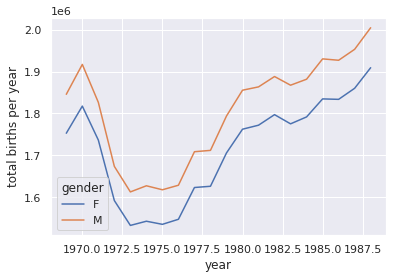

In [232]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
sns.set()  # use Seaborn styles

births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year');

In [228]:
# отсечем аномальные значения с помощью sigma-clipping
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

In [229]:
# отфильтруем строки, в которых кол-во новорожденных аномально
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [230]:
# сделаем столбец 'day' целочисленным, тк. избавились от пустых значений
births['day'] = births['day'].astype(int)

In [231]:
# создадим индекс для даты, объединив день, месяц и год (временная метка)
births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')

births['dayofweek'] = births.index.dayofweek

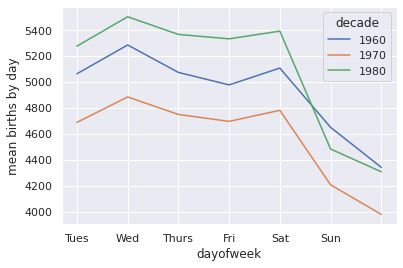

In [233]:
# построим график кол-ва новорожденных в зависимости от дня недели
births.pivot_table('births', index='dayofweek',
                    columns='decade', aggfunc='mean').plot()
plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun'])
plt.ylabel('mean births by day');

In [234]:
# построим такую-же зависимость от дня года. Для начала мгрппируем отдельно по месяцу и дню
births_by_date = births.pivot_table('births', 
                                    [births.index.month, births.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [235]:
# Чтобы упростить построение графика, свяжем данные с фиктивным високостным годом
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]
births_by_date.head()

/home/konstantin/anaconda3/envs/ml-base/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


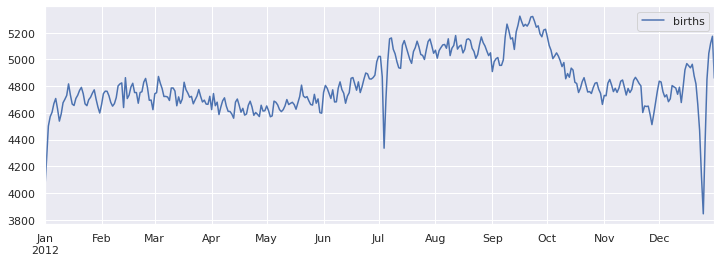

In [236]:
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);